In [9]:
import scipy.stats as sps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import statistics 
import cmath
from matplotlib import ticker
from math import factorial
from math import exp
from math import log

In [10]:
def Normrnd(a,sd,size):
    distr = sps.norm(a, sd).rvs(size)
    distr.sort()
    print (
        '\nПараметр a = ', a,
       '\nПараметр sd = ', sd,)
    print ('Нормальное распределение:\n',distr)
    return (distr)

def Exprnd(lm,size):
    distr = sps.expon(lm).rvs(size)
    distr.sort()
    print (
        '\nПараметр lambda = ', lm,)
    print ('Показательное распределение:\n',distr)
    return (distr)

def Uniformrnd(a,b,size):
    distr = sps.uniform(a, b).rvs(size)
    distr.sort()
    print (
        '\nПараметр a = ', a,
       '\nПараметр b = ', b,)
    print ('Равномерное распределение:\n',distr)
    return (distr)


def Xi(distr, size):
    xi = []
    for i in range(size):
        if distr[i]!=distr[i-1]:
            xi.append(distr[i])
    return(xi)

def Freq(distr, xi, size):
    ni=[]
    for j in range(len(xi)):
        help = 0
        for i in range(size):
            if distr[i]==xi[j]:
                help += 1
        ni.append(help)  
    return(ni)

def Rel_freq(ni, size):
    wi = []
    for i in range(len(ni)):
        wi.append(ni[i]/size)
    return(wi)

def koef_srfq(wi, k):
    S=0
    for i in range (k+1):
        S = S + wi[i]
    return(S)  

def Sum_rfq(wi, k):
    sk = []
    for i in range (len(wi)):
        sk.append(koef_srfq(wi,i))
    return(sk)

In [55]:
def intervals(xi, size):
    m = 1+round(log(size,2))
    d = xi[len(xi)-1] - xi[0]
    a = [xi[0]]
    for i in range (1,(m+1)):
        a.append(d/m+a[i-1])
    return a

def Freq_inter(distr, inter, size):
    ni=[]
    for j in range(1,len(inter)):
        count = 0
        h=0
        for i in range(size):
            if j-1 == 0:
                if distr[i]>=inter[j-1] and distr[i]<=inter[j]:
                    count +=1
            elif j == len(inter)-1:
                if distr[i]>inter[j-1] and distr[i]<=inter[j]:                
                    count += 1
                if distr[i]>inter[j]:
                    count += 1
            else:
                if distr[i]>inter[j-1] and distr[i]<=inter[j]:                
                    count += 1
        ni.append(count)  
    return(ni)

def X_X(inter):
    x_x = []
    for i in range(len(inter)-1):
        x_x.append((inter[i]+inter[i+1])/2)
    return(x_x)


def Mean(xi ,wi):
    X = 0
    for i in range (len(xi)):
        help = xi[i]*wi[i]
        X += help
    return (X)

def DispSh (inter,m,xi,wi,mean):
    h = (inter[len(inter)-1]-inter[0])/m
    s=xi
    for i in range (len(xi)):
        s[i]=((xi[i]-mean)**2)*wi[i]-(h**2)/12
    
    return (sum(s))

In [39]:
v = 46
a_norm = round((-1)**v*0.1*v,2)
sigma = 0.005*v+1
size=200
xi = []
ni = []
wi = []
sk = []
#xi - значение
#ni - кол-во значения
#sum(ni) = size 
#wi = ni/size
#sk = sum(wj)

distr1 = Normrnd(a_norm,sigma,size)
xi = Xi(distr1, size)
ni = Freq(distr1, xi, size)
wi= Rel_freq(ni, size)
sk = Sum_rfq(wi, size)

#Distr2 = Geomerty(p,size)
#Distr3 = Poisson(l,size)


Параметр a =  4.6 
Параметр sd =  1.23
Нормальное распределение:
 [1.32456634 1.62903858 2.08161927 2.29389118 2.38327623 2.42367288
 2.55514401 2.56954835 2.64114296 2.65292615 2.7487351  2.75074968
 2.88060155 2.97961866 3.06500497 3.1033995  3.13909366 3.15098307
 3.15159762 3.24201974 3.24602329 3.25772899 3.27562949 3.31453892
 3.34830462 3.40078258 3.43636007 3.45702313 3.53430563 3.5753881
 3.60224653 3.64732188 3.68795399 3.6881611  3.74084803 3.75156977
 3.75442087 3.76148646 3.79194361 3.79255653 3.79341873 3.79728619
 3.79872024 3.80502441 3.81735789 3.82989929 3.83052165 3.86431731
 3.87929309 3.89347424 3.91826942 3.93840869 3.95347796 3.98994167
 3.98999401 4.00102402 4.00325904 4.0375307  4.06539695 4.08825755
 4.09287787 4.09632866 4.12208155 4.13434997 4.15316646 4.15859247
 4.16964365 4.17173807 4.17471324 4.1777381  4.18696935 4.18747031
 4.21206431 4.23606445 4.24185091 4.24222242 4.28488325 4.29815115
 4.30213973 4.30443622 4.30967856 4.33224204 4.3474077  4.36628

In [40]:
#Table2 = pd.DataFrame({'Xi':xi, 'Ni':ni, 'Wi':wi})
#Table2

In [41]:
inter = intervals(xi,size)
inter    

#inter = [[a[0],a[1]], ... , [a[n-1],a[n]]]

[1.3245663424607286,
 1.9802225477071116,
 2.6358787529534946,
 3.2915349581998776,
 3.9471911634462606,
 4.602847368692644,
 5.258503573939027,
 5.91415977918541,
 6.569815984431793,
 7.225472189678176]

In [42]:
interval_all = [[inter[0], inter[1]],
                [inter[1], inter[2]],
                [inter[2], inter[3]],
                [inter[3], inter[4]],
                [inter[4], inter[5]],
                [inter[5], inter[6]],
                [inter[6], inter[7]],
                [inter[7], inter[8]],
                [inter[8], inter[9]],]
print (interval_all)

[[1.3245663424607286, 1.9802225477071116], [1.9802225477071116, 2.6358787529534946], [2.6358787529534946, 3.2915349581998776], [3.2915349581998776, 3.9471911634462606], [3.9471911634462606, 4.602847368692644], [4.602847368692644, 5.258503573939027], [5.258503573939027, 5.91415977918541], [5.91415977918541, 6.569815984431793], [6.569815984431793, 7.225472189678176]]


In [43]:
ni_inter = Freq_inter(distr1, inter, size)
print (ni_inter)
print (sum(ni_inter))

[2, 6, 15, 29, 49, 50, 30, 14, 5]
200


In [44]:
wi_inter = Rel_freq(ni_inter,size)
print (wi_inter)
print (sum(wi_inter))

[0.01, 0.03, 0.075, 0.145, 0.245, 0.25, 0.15, 0.07, 0.025]
1.0


In [45]:
Table = pd.DataFrame({'Intervals':interval_all, 'Ni':ni_inter, 'Wi':wi_inter})
Table

,Intervals,Ni,Wi
0,"[1.3245663424607286, 1.9802225477071116]",2,0.010
1,"[1.9802225477071116, 2.6358787529534946]",6,0.030
2,"[2.6358787529534946, 3.2915349581998776]",15,0.075
3,"[3.2915349581998776, 3.9471911634462606]",29,0.145
4,"[3.9471911634462606, 4.602847368692644]",49,0.245
5,"[4.602847368692644, 5.258503573939027]",50,0.250
6,"[5.258503573939027, 5.91415977918541]",30,0.150
7,"[5.91415977918541, 6.569815984431793]",14,0.070
8,"[6.569815984431793, 7.225472189678176]",5,0.025


In [46]:
x_x = X_X(inter)

Table = pd.DataFrame({'center_Intervals':x_x, 'Ni':ni_inter, 'Wi':wi_inter})
Table

,center_Intervals,Ni,Wi
0,1.652394,2,0.010
1,2.308051,6,0.030
2,2.963707,15,0.075
3,3.619363,29,0.145
4,4.275019,49,0.245
5,4.930675,50,0.250
6,5.586332,30,0.150
7,6.241988,14,0.070
8,6.897644,5,0.025


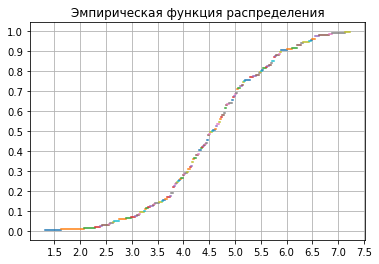

In [47]:
# график функции эмпирического распределения
fig, sec = plt.subplots()
sec.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
sec.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
for k in range(len(xi) - 1):
    sec.plot([xi[k], xi[k+1]], [sk[k], sk[k]])
plt.title("Эмпирическая функция распределения")
plt.grid(True)
plt.show()

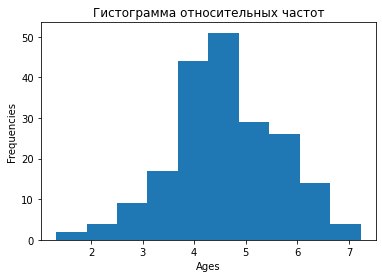

In [48]:
plt.hist(distr1)

plt.title("Гистограмма относительных частот")

plt.xlabel("Ages")

plt.ylabel("Frequencies")

plt.show()

Text(0.5, 0, '$x_i$')

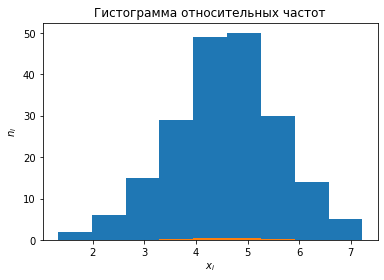

In [49]:
m = 1+round(log(size,2))

plt.hist(distr1, bins = m) # тут строится диаграма частот, то есть сколько раз встречается число
plt.title('Гистограмма') # тут вроде все верно
plt.ylabel('$n_i$')
plt.xlabel('$x_i$')
 
plt.hist(distr1, bins = m, density = True, label = 'выборка') # Основная проблема вот тут
plt.title('Гистограмма относительных частот') # Почему то неверно строиться график функции
plt.ylabel('$n_i$')
plt.xlabel('$x_i$')

In [56]:
#Выборочное среднее (теор/эксп)
#X_teor = n*p
X = Mean(x_x,wi)
print ('\n', X,'\n')


#Выборочная дисперсия с поправкой Шепарда (теор/эксп)
#D_teor = n*p*(1-p)
D = DispSh(inter,m,x_x,wi_inter,X)
print ('\n', D,'\n')




 0.10090567789638646 


 14.724920600461001 

